In [2]:
# importing the libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
from keras.utils import np_utils
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing the MNIST dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X train shape :  (60000, 28, 28)
y train shape :  (60000,)
X test shape :  (10000, 28, 28)
y test shape :  (10000,)


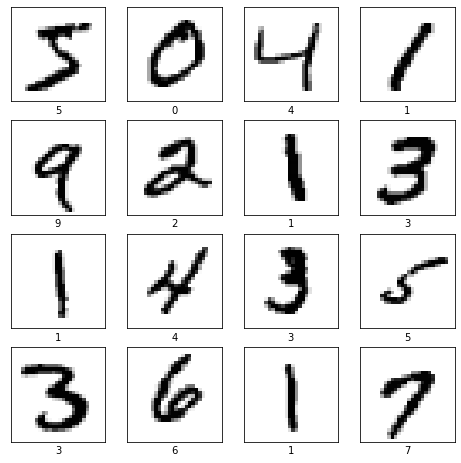

In [5]:
# let's plot some training images
plt.figure(figsize = (8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i], cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])

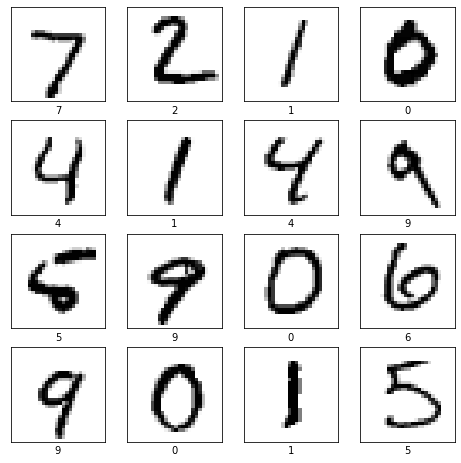

In [6]:
# let's plot some testing images
plt.figure(figsize = (8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i], cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_test[i])

In [7]:
# lets normalize the inputs from 0-255 to 0-1

X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# let's reshape X_train and X_test to include channel dim too
# format : [no of training samples][width][height][no of channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [10]:
print(X_train[0].shape)
#print(X_train[0])

(28, 28, 1)


In [11]:
print(y_train.shape)
print(y_train[0])

(60000,)
5


In [12]:
# one hot encoding outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
print("number of output classes : ", num_classes)
print(y_train.shape)
print(y_train[0])

number of output classes :  10
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
# baseline model.

model = Sequential()
# input layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(num_classes, activation = 'softmax'))    

In [15]:
# summary of the model.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [16]:
# lets compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# lets fit the model on training data.

history = model.fit(X_train, y_train, epochs = 5, batch_size = 128, verbose = 1)

Epoch 1/5
469/469 [==============================] - 57s 121ms/step - loss: 0.1782 - accuracy: 0.9455
Epoch 2/5
469/469 [==============================] - 57s 121ms/step - loss: 0.0643 - accuracy: 0.9803
Epoch 3/5
469/469 [==============================] - 58s 125ms/step - loss: 0.0419 - accuracy: 0.9865
Epoch 4/5
469/469 [==============================] - 60s 127ms/step - loss: 0.0356 - accuracy: 0.9887
Epoch 5/5
469/469 [==============================] - 59s 126ms/step - loss: 0.0249 - accuracy: 0.9914


In [20]:
# evaluating the model on training data

score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training loss : ", score[1])

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0076 - accuracy: 0.9975
Training loss :  0.007560024503618479
Training loss :  0.9975333213806152


In [21]:
# evaluating the model on testing data

score = model.evaluate(X_test, y_test)
print("Testing loss : ", score[0])
print("Testing loss : ", score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0444 - accuracy: 0.9868
Testing loss :  0.04442745819687843
Testing loss :  0.9868000149726868


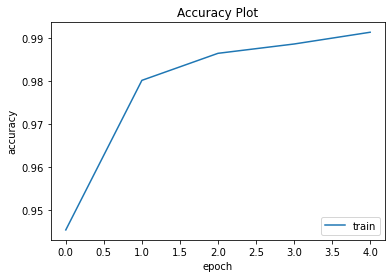

In [22]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.title("Accuracy Plot")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

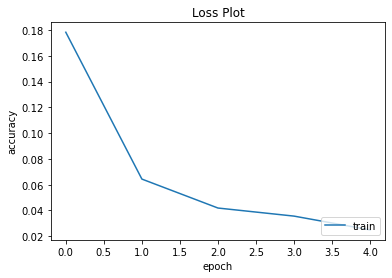

In [23]:
# loss plot
plt.plot(history.history['loss'])
plt.title("Loss Plot")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 0, '0')

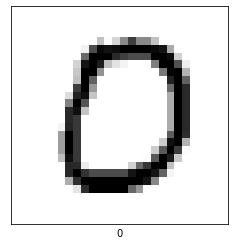

In [24]:
# lets predict on testing data

img = X_test[10]
plt.imshow(img.reshape(28, 28), cmap = 'binary')
plt.xticks([])
plt.yticks([])
plt.xlabel(np.argmax(y_test[10]))

In [25]:
pred = model.predict(img.reshape(-1, 28, 28, 1))
print(pred)

[[1.0000000e+00 7.5345164e-12 7.6971957e-10 5.7860195e-13 1.0734719e-11
  3.7743387e-13 8.9881480e-09 2.2297489e-12 4.5980355e-11 2.3956785e-08]]


In [26]:
print("Predicted digit : ", np.argmax(pred))

Predicted digit :  0


# EXPLORATION PART

## Number of filters

In [27]:
import time
filters = [4, 32, 64, 128]
models_filter, history_filter, times = [], [], []


for i, f in enumerate(filters):
    model = Sequential()
    model.add(Conv2D(filters = f, kernel_size = (3, 3), strides = 1, activation = 'relu', input_shape = (28, 28, 1)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    
    # model summary
    models_filter.append(model)
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # fitting the model on training data
    start = time.time()
    hist = model.fit(X_train, y_train, epochs = 5, batch_size = 256, verbose = 0)
    times.append(time.time() - start)
    history_filter.append(hist)
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------")    


1875/1875 [==============================] - 15s 8ms/step - loss: 0.2145 - accuracy: 0.9390
Model :  0
Training loss :  0.21446144580841064
Training accuracy :  0.9389833211898804
-------------------------------------------------
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0763 - accuracy: 0.9793
Model :  1
Training loss :  0.0762501135468483
Training accuracy :  0.9793333411216736
-------------------------------------------------
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0509 - accuracy: 0.9859
Model :  2
Training loss :  0.050939735025167465
Training accuracy :  0.9859499931335449
-------------------------------------------------
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0451 - accuracy: 0.9869
Model :  3
Training loss :  0.0451337955892086
Training accuracy :  0.9869499802589417
-------------------------------------------------


We observe that with the increase in the number of filters the model accuracy increases as more features are captured by different features.

In [28]:
# plotting the model summaries

for i, model in enumerate(models_filter):
    print("No. of filters = ", filters[i])
    model.summary()
    print("-------------------------------------------------------------")

No. of filters =  4
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 676)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6770      
Total params: 6,810
Trainable params: 6,810
Non-trainable params: 0
_________________________________________________________________
-------------------------------------------------------------
No. of filters =  32
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Para

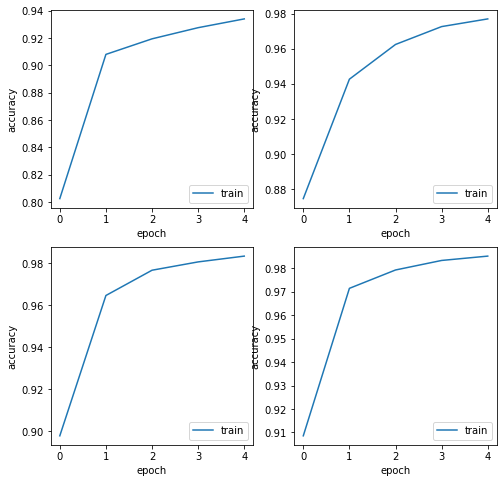

In [29]:
# plotting the accuracy curve

plt.figure(figsize = (8, 8))
for i in range(len(history_filter)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_filter[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

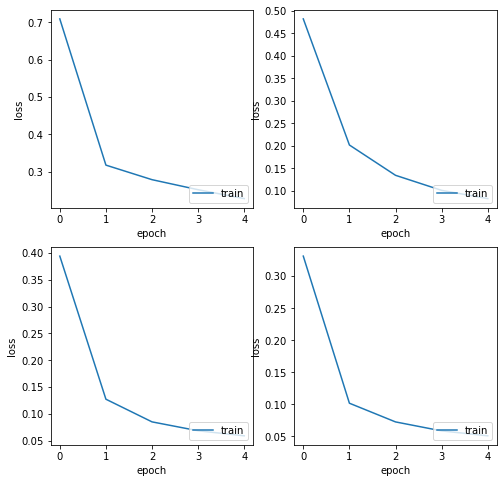

In [30]:
# plotting the loss curve

plt.figure(figsize = (8, 8))
for i in range(len(history_filter)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_filter[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 1.0, 'Time')

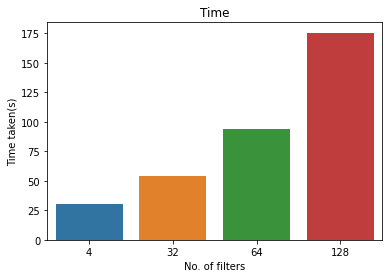

In [40]:
# plotting time comparison
plt.xlabel('No. of filters')
plt.ylabel('Time taken(s)')
sns.barplot(filters, times)
plt.title('Time')

## Number of layers

In [41]:
layers = [1, 2, 3, 4]
models_layer, history_layer, times = [], [], []

for i, layer in enumerate(layers):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, activation = 'relu', input_shape = (28, 28, 1)))
    for j in range(layer - 1):
        model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, activation = 'relu'))
    
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    # model summary
    models_layer.append(model)
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # fitting the model on training data
    start = time.time()
    hist = model.fit(X_train, y_train, epochs = 5, batch_size = 256, verbose = 0)
    times.append(time.time() - start)
    history_layer.append(hist)
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------") 


1875/1875 [==============================] - 12s 6ms/step - loss: 0.0420 - accuracy: 0.9890
Model :  0
Training loss :  0.04195893928408623
Training accuracy :  0.9889833331108093
-------------------------------------------------
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0233 - accuracy: 0.9931
Model :  1
Training loss :  0.023329054936766624
Training accuracy :  0.9930833578109741
-------------------------------------------------
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0159 - accuracy: 0.9955
Model :  2
Training loss :  0.015898095443844795
Training accuracy :  0.9954666495323181
-------------------------------------------------
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0160 - accuracy: 0.9950
Model :  3
Training loss :  0.015952840447425842
Training accuracy :  0.9950166940689087
-------------------------------------------------


In [44]:
# plotting the model summaries

for i, model in enumerate(models_layer):
    print("No. of Conv Layers = ", layers[i])
    model.summary()
    print("-------------------------------------------------------------")

No. of Conv Layers =  1
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_5 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                216330    
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________
-------------------------------------------------------------
No. of Conv Layers =  2
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
________________________________________________

Again we can observe that with the increase in the number of layers, the model accuracy increases a bit. Also the amount of trainable parameters increases a lot thereby increasing the training time.

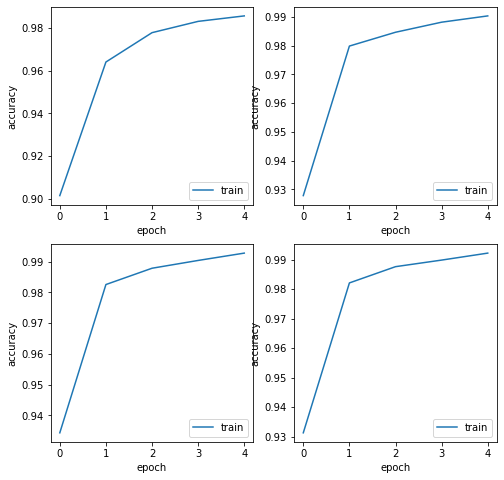

In [46]:
# plotting the accuracy curve

plt.figure(figsize = (8, 8))
for i in range(len(history_layer)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_layer[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

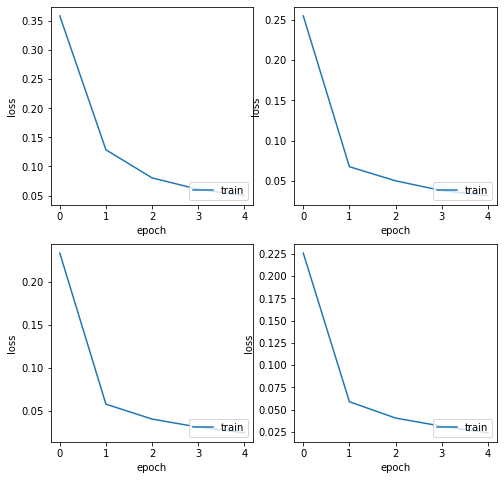

In [47]:
# plotting the loss curve

plt.figure(figsize = (8, 8))
for i in range(len(history_layer)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_layer[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 1.0, 'Time')

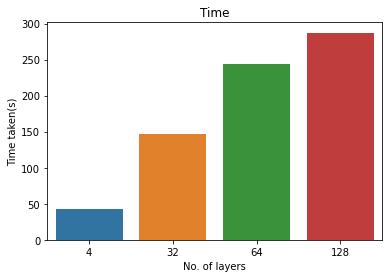

In [55]:
# plotting time comparison
plt.xlabel('No. of layers')
plt.ylabel('Time taken(s)')
sns.barplot(filters, times)
plt.title('Time')

Text(0.5, 0, 'Actual digit : 9')

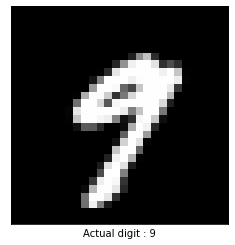

In [48]:
# testing on unseen data

img = X_test[20]
plt.imshow(img.reshape(28, 28), cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel("Actual digit : " + str(np.argmax(y_test[20])))

In [54]:
img = img.reshape(-1, 28, 28, 1)
for i, model in enumerate(models_filter):
    pred = model.predict(img)
    print("Model : ", i + 1)
    print("No of filters : ", filters[i])
    print("Predicted digit : ", np.argmax(pred))
    print("----------------------------------------")

Model :  1
No of filters :  4
Predicted digit :  9
----------------------------------------
Model :  2
No of filters :  32
Predicted digit :  9
----------------------------------------
Model :  3
No of filters :  64
Predicted digit :  9
----------------------------------------
Model :  4
No of filters :  128
Predicted digit :  9
----------------------------------------


In [53]:
img = img.reshape(-1, 28, 28, 1)
for i, model in enumerate(models_layer):
    pred = model.predict(img)
    print("Model : ", i + 1)
    print("No of layers : ", layers[i])
    print("Predicted digit : ", np.argmax(pred))
    print("----------------------------------------")

Model :  1
No of layers :  1
Predicted digit :  9
----------------------------------------
Model :  2
No of layers :  2
Predicted digit :  9
----------------------------------------
Model :  3
No of layers :  3
Predicted digit :  9
----------------------------------------
Model :  4
No of layers :  4
Predicted digit :  9
----------------------------------------


## Size of filters

In [57]:
filter_size = [3, 5, 7]
models_fs, history_fs, times = [], [], []

for i, f in enumerate(filter_size):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (f, f), strides = 1, activation = 'relu', input_shape = (28, 28, 1)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 32, kernel_size = (f, f), strides = 1, activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    # model summary
    models_fs.append(model)
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # fitting the model on training data
    start = time.time()
    hist = model.fit(X_train, y_train, epochs = 5, batch_size = 256, verbose = 0)
    times.append(time.time() - start)
    history_fs.append(hist)
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------") 


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0361 - accuracy: 0.9887
Model :  0
Training loss :  0.03613333776593208
Training accuracy :  0.9886999726295471
-------------------------------------------------
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315 - accuracy: 0.9900
Model :  1
Training loss :  0.03148603066802025
Training accuracy :  0.9900333285331726
-------------------------------------------------
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0330 - accuracy: 0.9902
Model :  2
Training loss :  0.03300347179174423
Training accuracy :  0.9901833534240723
-------------------------------------------------


In [59]:
# plotting the model summaries

for i in range(len(filter_size)):
    print("Filter Size : {}x{}".format(filter_size[i], filter_size[i]))
    models_fs[i].summary()
    print("-------------------------------------------------------------")

Filter Size : 3x3
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
flatten_9 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                38730     
Total params: 48,298
Trainable params: 48,298
Non-trainable params: 0
_________________________________________________________________
-------------------------------------------------------------
Filter Size : 5x5
Model: "sequential

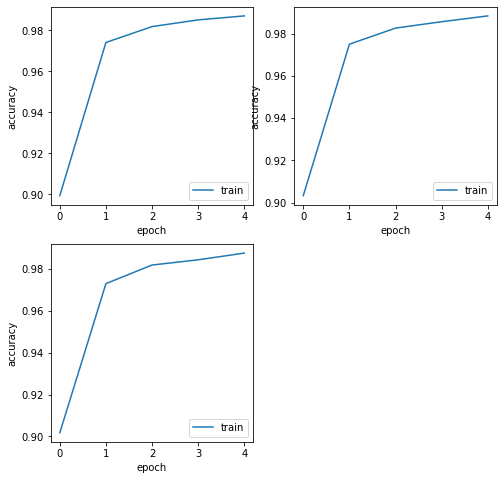

In [63]:
# plotting the accuracy curve

plt.figure(figsize = (8, 8))
for i in range(len(history_fs)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_fs[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

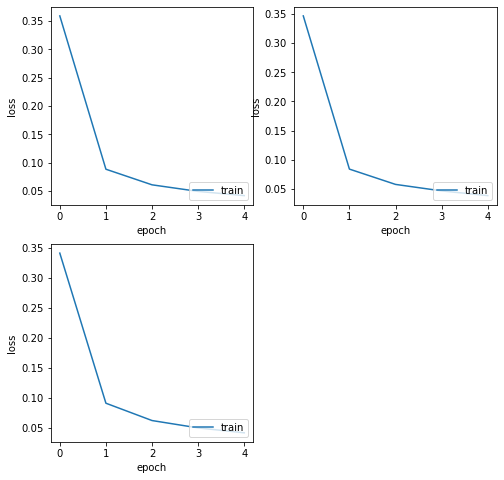

In [62]:
# plotting the loss curve

plt.figure(figsize = (8, 8))
for i in range(len(history_fs)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_fs[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 1.0, 'Time')

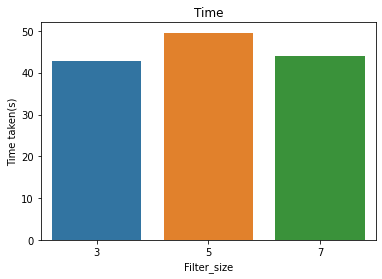

In [65]:
# plotting time comparison
plt.xlabel('Filter_size')
plt.ylabel('Time taken(s)')
sns.barplot(filter_size, times)
plt.title('Time')

## Activation Function

In [67]:
activations = ['sigmoid', 'tanh', 'relu']
models_act, history_act, times = [], [], []

for i in range(len(activations)):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, activation = activations[i], input_shape = (28, 28, 1)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, activation = activations[i]))
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    # model summary
    models_act.append(model)
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # fitting the model on training data
    start = time.time()
    hist = model.fit(X_train, y_train, epochs = 5, batch_size = 256, verbose = 0)
    times.append(time.time() - start)
    history_act.append(hist)
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------") 


1875/1875 [==============================] - 4s 2ms/step - loss: 0.1931 - accuracy: 0.9437
Model :  0
Training loss :  0.1930546760559082
Training accuracy :  0.9436666369438171
-------------------------------------------------
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0457 - accuracy: 0.9865
Model :  1
Training loss :  0.04566901922225952
Training accuracy :  0.9864833354949951
-------------------------------------------------
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0337 - accuracy: 0.9901
Model :  2
Training loss :  0.03366081044077873
Training accuracy :  0.9901166558265686
-------------------------------------------------


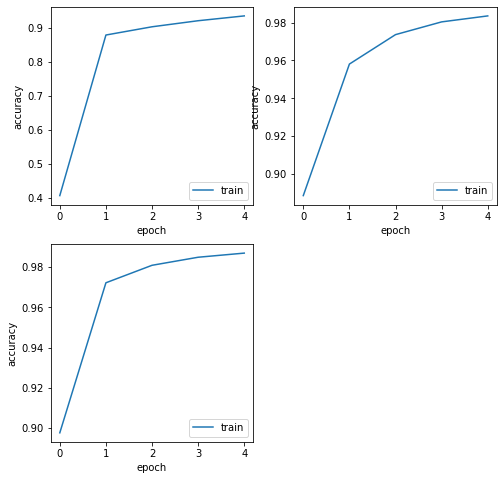

In [68]:
# plotting the accuracy curve

plt.figure(figsize = (8, 8))
for i in range(len(history_act)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_act[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

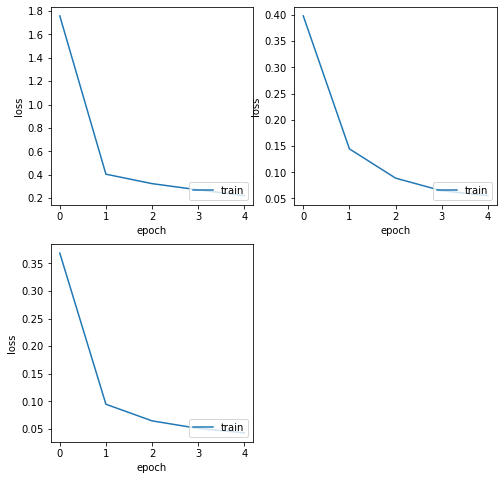

In [69]:
# plotting the loss curve

plt.figure(figsize = (8, 8))
for i in range(len(history_act)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_act[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 1.0, 'Time')

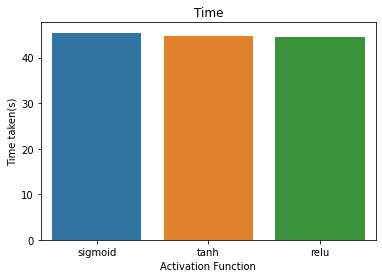

In [70]:
# plotting time comparison
plt.xlabel('Activation Function')
plt.ylabel('Time taken(s)')
sns.barplot(activations, times)
plt.title('Time')

## Influence of Striding

In [72]:
stride_len = [1, 2, 3]
models_str, history_str, times = [], [], []

for i, s in enumerate(stride_len):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (s, s), activation = 'relu', input_shape = (28, 28, 1)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (s, s), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    # model summary
    models_str.append(model)
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # fitting the model on training data
    start = time.time()
    hist = model.fit(X_train, y_train, epochs = 5, batch_size = 256, verbose = 0)
    times.append(time.time() - start)
    history_str.append(hist)
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------") 


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0358 - accuracy: 0.9892
Model :  0
Training loss :  0.035848233848810196
Training accuracy :  0.9892333149909973
-------------------------------------------------
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1291 - accuracy: 0.9618: 0s
Model :  1
Training loss :  0.129119411110878
Training accuracy :  0.9617999792098999
-------------------------------------------------
1875/1875 [==============================] - 2s 906us/step - loss: 0.3741 - accuracy: 0.8844
Model :  2
Training loss :  0.37409889698028564
Training accuracy :  0.8844333291053772
-------------------------------------------------


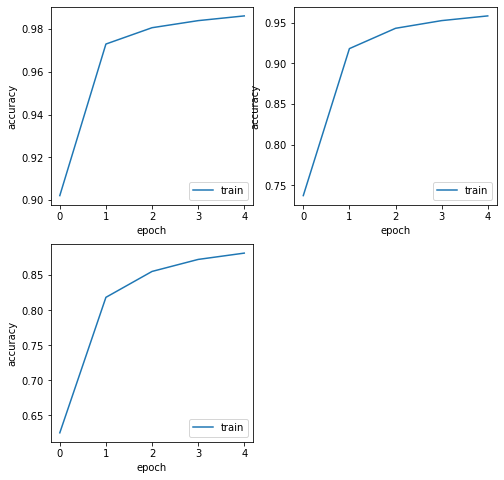

In [73]:
# plotting the accuracy curve

plt.figure(figsize = (8, 8))
for i in range(len(history_str)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_str[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

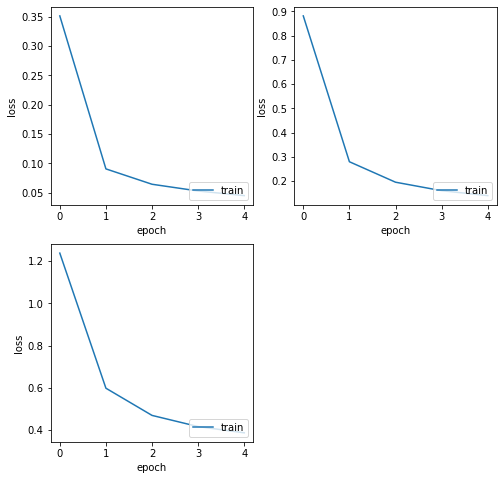

In [74]:
# plotting the loss curve

plt.figure(figsize = (8, 8))
for i in range(len(history_str)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_str[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 1.0, 'Time')

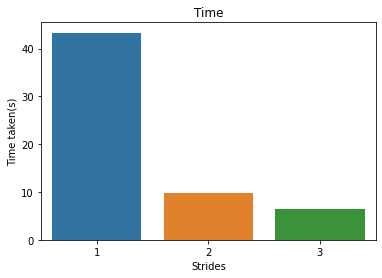

In [76]:
# plotting time comparison
plt.xlabel('Strides')
plt.ylabel('Time taken(s)')
sns.barplot(stride_len, times)
plt.title('Time')

## Influence of Padding

In [78]:
padding = ["valid", "same"]
models_pad, history_pad, times = [], [], []

for i, p in enumerate(padding):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (3, 3), padding = p, activation = 'relu', input_shape = (28, 28, 1)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (3, 3), padding = p, activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    # model summary
    models_pad.append(model)
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # fitting the model on training data
    start = time.time()
    hist = model.fit(X_train, y_train, epochs = 5, batch_size = 256, verbose = 0)
    times.append(time.time() - start)
    history_pad.append(hist)
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------") 


1875/1875 [==============================] - 2s 891us/step - loss: 0.3765 - accuracy: 0.8845
Model :  0
Training loss :  0.37648651003837585
Training accuracy :  0.8844500184059143
-------------------------------------------------
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1823 - accuracy: 0.9458
Model :  1
Training loss :  0.1823371797800064
Training accuracy :  0.9457833170890808
-------------------------------------------------


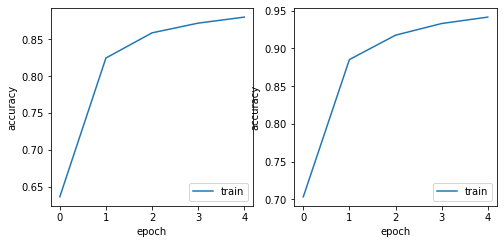

In [79]:
# plotting the accuracy curve

plt.figure(figsize = (8, 8))
for i in range(len(history_pad)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_pad[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

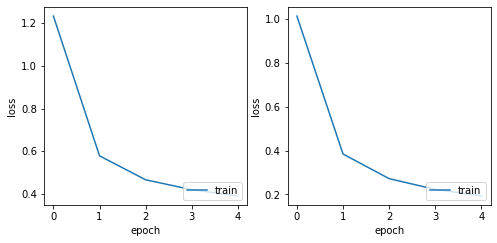

In [80]:
# plotting the loss curve

plt.figure(figsize = (8, 8))
for i in range(len(history_pad)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_pad[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 1.0, 'Time')

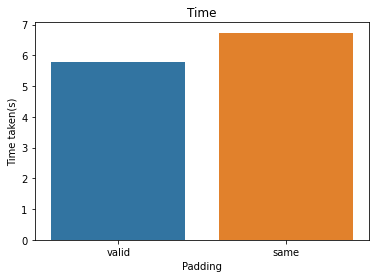

In [82]:
# plotting time comparison
plt.xlabel('Padding')
plt.ylabel('Time taken(s)')
sns.barplot(padding, times)
plt.title('Time')

## Influence of Pooling

In [83]:
pool_len = [2, 3]
models_pool, history_pool, times = [], [], []

for i, pool in enumerate(pool_len):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', input_shape = (28, 28, 1)))
    model.add(MaxPool2D(pool_size = (pool, pool)))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    # model summary
    models_pool.append(model)
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # fitting the model on training data
    start = time.time()
    hist = model.fit(X_train, y_train, epochs = 5, batch_size = 256, verbose = 0)
    times.append(time.time() - start)
    history_pool.append(hist)
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------") 


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0379 - accuracy: 0.9882
Model :  0
Training loss :  0.03790584206581116
Training accuracy :  0.9882000088691711
-------------------------------------------------
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632 - accuracy: 0.9799
Model :  1
Training loss :  0.06315289437770844
Training accuracy :  0.9798833131790161
-------------------------------------------------


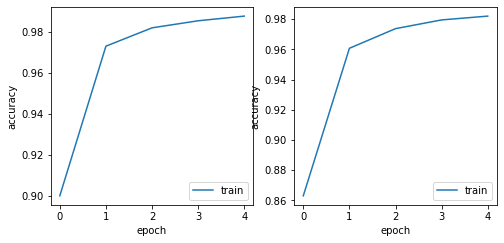

In [84]:
# plotting the accuracy curve

plt.figure(figsize = (8, 8))
for i in range(len(history_pool)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_pool[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

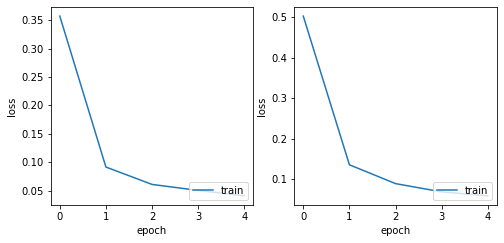

In [85]:
# plotting the loss curve

plt.figure(figsize = (8, 8))
for i in range(len(history_pool)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_pool[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 1.0, 'Time')

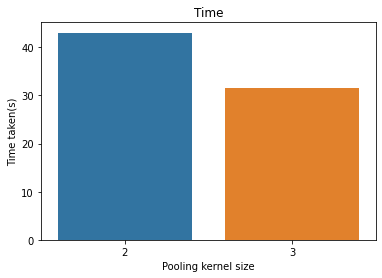

In [86]:
# plotting time comparison
plt.xlabel('Pooling kernel size')
plt.ylabel('Time taken(s)')
sns.barplot(pool_len , times)
plt.title('Time')